# Аналитика данных с помощью `pandas` и `matplotlib`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


#### Загрузка заранее подготовленного датасет из файла `coins.csv`. Создание объекта типа `pandas.DataFrame` с именем `coins` и в качестве индекса выберается колонка с датой.

In [2]:
coins = pd.DataFrame(data=pd.read_csv("coins.csv", index_col="date"))

Посмотрим что получилось

In [3]:
coins.head(4)

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясня значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

Изучим полученные данные.

### 1. Сколько всего различных монет представлено в датасете?

In [4]:
coins['name'].nunique()

70

### 2. За какой период данные мы имеем?

In [5]:
coins_sort = coins.sort_values(['date'])
fr = coins_sort.index[0]
to = coins_sort.index[-1]
f'Период данных: c {fr} до {to}'


'Период данных: c 2013-04-28 до 2018-06-06'

### 3. Есть ли пропуски в данных? Какой природы эти пропуски, чем они скорее всего вызваны?

In [6]:
omissions = coins.isnull().sum()
cnt_omissions = omissions.sum()
if (cnt_omissions):
  print(f'Пропуски данных есть, их суммарно {cnt_omissions} во всех строках')
  print(omissions)
# coins[coins.isnull().any(1)]
print("Пропуски данных скорее всего связаны со сбоями в сети в этот день,\n так как все пропуски встречаются только в данных, зависящих от сети в данный день")


Пропуски данных есть, их суммарно 5197 во всех строках
price               327
txCount            1520
txVolume           1830
activeAddresses    1520
symbol                0
name                  0
open                  0
high                  0
low                   0
close                 0
volume                0
market                0
dtype: int64
Пропуски данных скорее всего связаны со сбоями в сети в этот день,
 так как все пропуски встречаются только в данных, зависящих от сети в данный день


### 4. У какой монеты и когда была самая высокая цена?


In [7]:
print(coins['name'][coins['price'] == coins['price'].max()])
coins[coins['price'] == coins['price'].max()] #для справки и более простой проверки


date
2017-12-17    Bitcoin
Name: name, dtype: object


,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2017-12-17,19475.8,391725.0,3.746920e+10,1176110.0,BTC,Bitcoin,19475.8,20089.0,18974.1,19140.8,1.331460e+10,3.261410e+11


### 5. У какой монеты самая высокая и самая низкая средняя капитализация (среднее арифметическое капитализаций за все доступные дни)? Построение круговой диаграммы с долями.

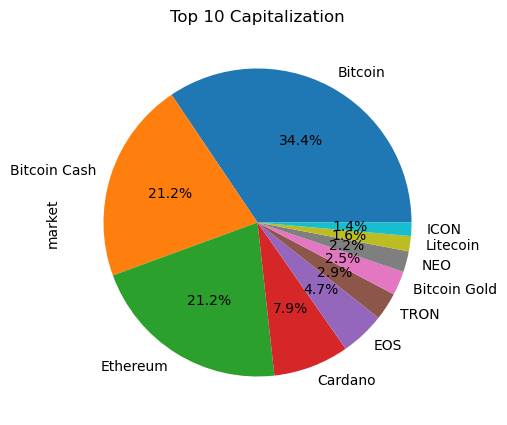

Max: Bitcoin
Min: KingN Coin


In [8]:
market_cap = coins.groupby('name')['market'].mean().sort_values()

highest_cap_coin = market_cap.idxmax()
lowest_cap_coin = market_cap.idxmin()

N = 10
topN_coins = market_cap.nlargest(N)
plt.figure(figsize=(5, 5))

topN_coins.plot(kind='pie', autopct='%1.1f%%')
plt.title(f'Top {N} Capitalization')
plt.show()

print(f'Max: {highest_cap_coin}')
print(f'Min: {lowest_cap_coin}')
